## Importing Libraries and Loading Our Data

In [88]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [89]:
df = pd.read_csv('../data/AllMoviesDetailsCleaned.csv')
df.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.474450,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698000,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.322870,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [90]:
#Add from saurav API inputs

In [91]:
df = df[df['revenue']!=0]

In [92]:
df[df.duplicated()]

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number


## Understanding the Dataset

In [93]:
df.columns

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number'],
      dtype='object')

### Features

* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

In [94]:
df.shape

(8690, 22)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8690 entries, 2 to 328796
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8690 non-null   int64  
 1   budget                       8690 non-null   int64  
 2   genres                       8396 non-null   object 
 3   imdb_id                      8340 non-null   object 
 4   original_language            8689 non-null   object 
 5   original_title               8690 non-null   object 
 6   overview                     8417 non-null   object 
 7   popularity                   8690 non-null   float64
 8   production_companies         8690 non-null   object 
 9   production_countries         8690 non-null   object 
 10  release_date                 8586 non-null   object 
 11  revenue                      8690 non-null   int64  
 12  runtime                      8532 non-null   float64
 13  spoken_languages

There are a total of ~10k movies** with **22 features**.

## Data Wrangling

In [96]:
df = df.drop(['imdb_id'], axis=1)

In [97]:
df[df['original_title'] != df['title']][['title', 'original_title']].head()

,title,original_title
34,Talk to Her,Hable con Ella
48,Hero,英雄
50,Nausicaä of the Valley of the Wind,風の谷のナウシカ
67,All About My Mother,Todo sobre mi madre
69,Leon: The Professional,Léon


In [98]:
df = df.drop('original_title', axis=1)

In [99]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(2704, 20)

In [100]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(2704, 21)

In [101]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [102]:
df.head()

,id,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,return,year
2,5,4000000.0,Crime|Comedy,en,It's Ted the Bellhop's first night on the job....,1.698000,Miramax Films,United States of America,25/12/1995,4300000,...,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1,1.075000,1995
3,6,NaN,Action|Thriller|Crime,en,"While racing to a boxing match, Frank, Mike, J...",1.322870,Universal Pictures,Japan,15/10/1993,12136938,...,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1,NaN,1993
6,11,11000000.0,Adventure|Action|Science Fiction,en,Princess Leia is captured and held hostage by ...,10.492614,Lucasfilm,United States of America,25/05/1977,775398007,...,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.0,6168,2,1,1,70.490728,1977
7,12,94000000.0,Animation|Family,en,"Nemo, an adventurous young clownfish, is unexp...",9.915573,Pixar Animation Studios,United States of America,30/05/2003,940335536,...,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,5531,1,1,1,10.003570,2003
8,13,55000000.0,Comedy|Drama|Romance,en,A man with a low IQ has accomplished great thi...,10.351236,Paramount Pictures,United States of America,06/07/1994,677945399,...,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7204,1,1,1,12.326280,1994


### Baseline score

In [103]:
df['revenue'].mean()

58078277.355005756

## Exploratory Data Analysis
### Title and Overview Wordclouds

In [104]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [105]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

In [106]:
!pip install wordcloud

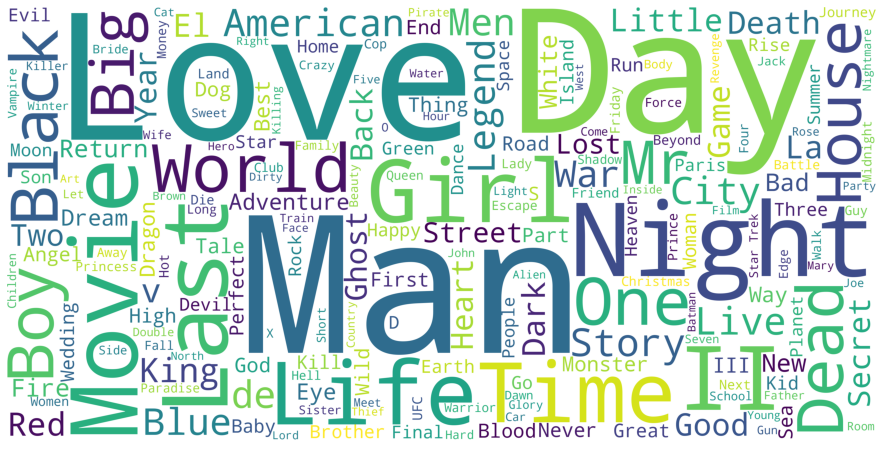

In [107]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**Analysis:** The word **Love** is the most commonly used word in movie titles. **Girl**, **Day** and **Man** are also among the most commonly occuring words.

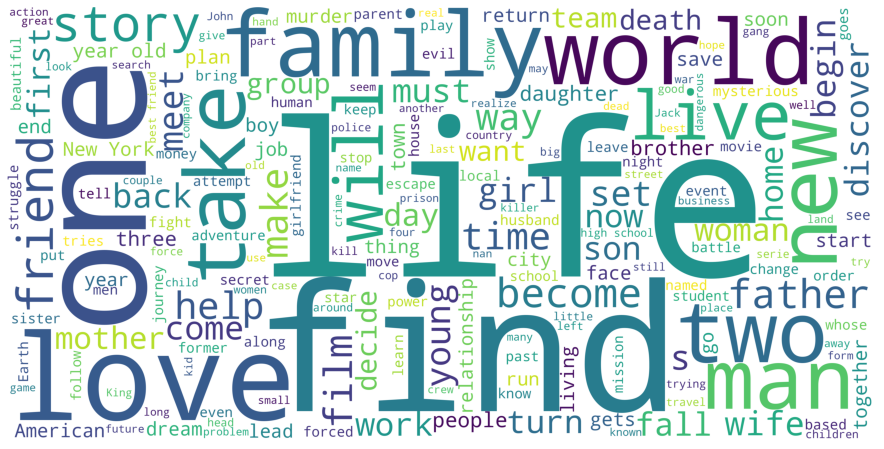

In [108]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

### Production Countries

In [109]:
df['production_countries'].value_counts()

United States of America    4583
United Kingdom               558
none                         495
India                        397
France                       385
                            ... 
Lebanon                        1
Dominican Republic             1
Congo                          1
Georgia                        1
Estonia                        1
Name: production_countries, Length: 94, dtype: int64

Dataset consists of movies that are in the English language. However, these movies may have shot in various locations around the world.

In [110]:
df

,id,budget,genres,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,return,year
2,5,4000000.0,Crime|Comedy,en,It's Ted the Bellhop's first night on the job....,1.698000,Miramax Films,United States of America,25/12/1995,4300000,...,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1,1.075000,1995
3,6,NaN,Action|Thriller|Crime,en,"While racing to a boxing match, Frank, Mike, J...",1.322870,Universal Pictures,Japan,15/10/1993,12136938,...,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1,NaN,1993
6,11,11000000.0,Adventure|Action|Science Fiction,en,Princess Leia is captured and held hostage by ...,10.492614,Lucasfilm,United States of America,25/05/1977,775398007,...,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.0,6168,2,1,1,70.490728,1977
7,12,94000000.0,Animation|Family,en,"Nemo, an adventurous young clownfish, is unexp...",9.915573,Pixar Animation Studios,United States of America,30/05/2003,940335536,...,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,5531,1,1,1,10.003570,2003
8,13,55000000.0,Comedy|Drama|Romance,en,A man with a low IQ has accomplished great thi...,10.351236,Paramount Pictures,United States of America,06/07/1994,677945399,...,Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7204,1,1,1,12.326280,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328433,468517,200.0,Documentary,es,nan,0.141433,zoowomania,Spain,26/06/2017,200,...,Released,NaN,Cine de Emboscada,0.0,0,1,1,1,1.000000,2017
328487,468579,1000.0,Drama|Fantasy,en,"A writer who has lost his thoughts, tries to f...",0.017510,Empty Spaces Pictures,United States of America,20/06/2016,700,...,Released,NaN,Thoughtless,0.0,0,1,3,0,0.700000,2016
328545,468654,800000.0,NaN,ar,nan,0.009000,none,Egypt,NaN,40000,...,Released,NaN,سكر برة Sugar On The Side,0.0,0,0,1,1,0.050000,NaT
328547,468656,NaN,Action|Adventure|Animation|Comedy|Crime|Family...,ur,3 Bahadur: The Revenge of Baba Balaam is a Pak...,0.096195,Waadi Animations,Pakistan,15/12/2016,640691,...,Released,The Revenge of Baba Balaam,3 Braves: The Revenge of Baba Balaam,8.0,1,3,1,1,NaN,2016


In [111]:
con_df = pd.DataFrame(df.groupby('production_countries').count()['id'].sort_values(ascending = False)[:10]).rename(columns={'id':'num_movies'})
con_df.reset_index(inplace=True)
con_df.rename(columns = {'production_countries' : 'country'},inplace = True)

In [112]:
con_df = con_df[con_df['country'] != 'United States of America']

In [113]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### Production Companies

In [114]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [115]:
com_df = df.drop('production_companies', axis=1).join(s)

In [116]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

#### Highest Earning Production Companies

Let us find out which production companies have earned the most money from the movie making business.

In [117]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Paramount Pictures,45155479895,1.207366e+08,374
Universal Pictures,44639268360,1.165516e+08,383
Walt Disney Pictures,38290445513,2.677654e+08,143
Columbia Pictures,31492008517,1.351588e+08,233
Twentieth Century Fox Film Corporation,30255127393,1.065321e+08,284
New Line Cinema,15944690295,8.436344e+07,189
Warner Bros.,12059927955,7.584860e+07,159
Village Roadshow Pictures,12030884383,1.743606e+08,69
DreamWorks SKG,11140923059,1.796923e+08,62


#### Most Succesful Production Companies

Which production companies produce the most succesful movies on average, considering those companies that have made at least 15 movies.

In [118]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Lucasfilm,9896293107,4.498315e+08,22
Ingenious Film Partners,7317139031,4.065077e+08,18
Legendary Pictures,6218217013,3.109109e+08,20
Walt Disney Pictures,38290445513,2.677654e+08,143
Universal Studios,3165387180,1.978367e+08,16
DreamWorks SKG,11140923059,1.796923e+08,62
Amblin Entertainment,3148897444,1.749387e+08,18
Village Roadshow Pictures,12030884383,1.743606e+08,69
Studio Babelsberg,3031198754,1.683999e+08,18


### Original Language

In [119]:
df['original_language'].drop_duplicates().shape[0]

59

In [120]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,6946,en
es,243,es
fr,214,fr
ru,188,ru
hi,143,hi


Let us represent the most popular languages (apart from English) in the form of a bar plot.

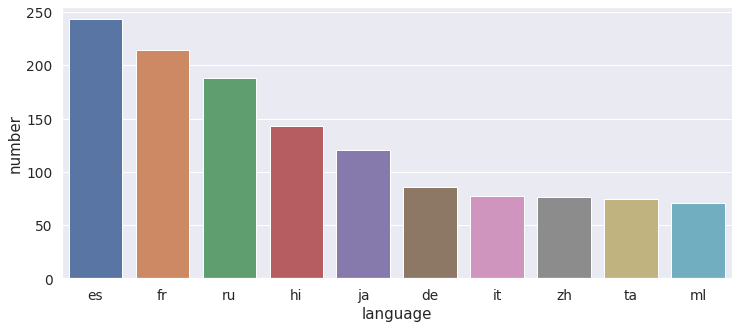

In [121]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

### Popularity, Vote Average and Vote Count

In [122]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [123]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

Let us examine the summary statistics and the distribution of each feature one by one.

In [124]:
df['popularity'].describe()

count    8690.000000
mean        1.612814
std         3.568066
min         0.000000
25%         0.231642
50%         0.976490
75%         2.029874
max       156.093026
Name: popularity, dtype: float64

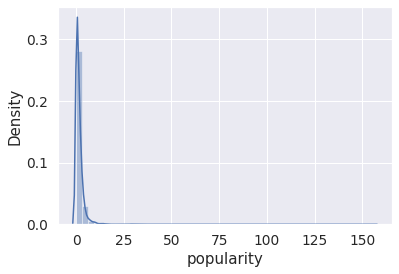

In [125]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

<AxesSubplot:ylabel='Frequency'>

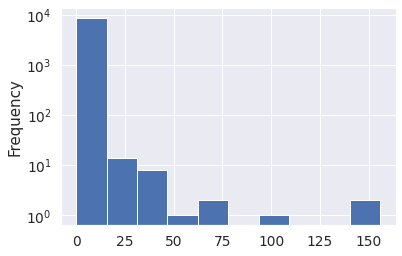

In [126]:
df['popularity'].plot(logy=True, kind='hist')

#### Most Popular Movies by Popularity Score

In [127]:
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
122940,Minions,156.093026,2015
204767,Beauty and the Beast,141.906549,2017
199312,Spider-Man: Homecoming,100.845437,2017
79525,Dawn of the Planet of the Apes,73.934067,2014
249994,Dunkirk,65.824935,2017
43154,Rise of the Planet of the Apes,53.086047,2011
152828,Logan,46.412928,2017
78923,Guardians of the Galaxy,41.182471,2014
97788,Interstellar,39.623834,2014
199481,Ghost in the Shell,34.648271,2017


In [128]:
df['vote_count'].describe()

count     8690.000000
mean       420.490219
std        930.173694
min          0.000000
25%         10.000000
50%         86.000000
75%        374.750000
max      12811.000000
Name: vote_count, dtype: float64

#### Most Voted on Movies

In [129]:
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
16503,Inception,12811.0,2010
119,The Dark Knight,11168.0,2008
14575,The Avengers,11100.0,2012
12167,Avatar,11022.0,2009
97788,Interstellar,9893.0,2014
179741,Deadpool,9829.0,2016
48723,Django Unchained,9496.0,2012
49872,The Hunger Games,8938.0,2012
78923,Guardians of the Galaxy,8775.0,2014
54567,Mad Max: Fury Road,8760.0,2015


**Inception** and **The Dark Knight**, figure at the top of our chart. 

In [130]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    8141.000000
mean        6.181231
std         1.134015
min         0.500000
25%         5.600000
50%         6.200000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

<AxesSubplot:xlabel='vote_average', ylabel='Density'>

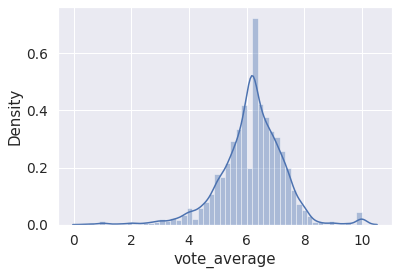

In [131]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

#### Most Critically Acclaimed Movies

In [132]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
233,The Shawshank Redemption,8.5,7711.0,1994
195,The Godfather,8.4,5478.0,1972
96,Spirited Away,8.3,3472.0,2001
140327,Whiplash,8.3,3880.0,2014
335,Schindler's List,8.3,3964.0,1993
553,Pulp Fiction,8.2,7761.0,1994
401,One Flew Over the Cuckoo's Nest,8.2,2650.0,1975
421,Psycho,8.2,2080.0,1960
119,The Dark Knight,8.2,11168.0,2008
512,Life Is Beautiful,8.2,3143.0,1997


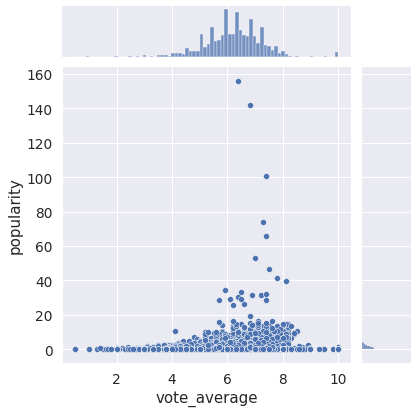

In [133]:
sns.jointplot(x='vote_average', y='popularity', data=df)

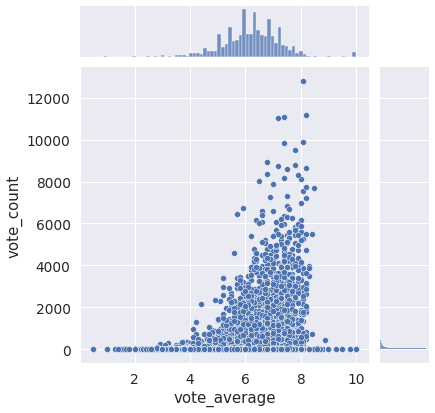

In [134]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

### Movie Release Dates

In [135]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [136]:
def get_month(x):
    try:
        return month_order[int(str(x).split('/')[1]) - 1]
    except:
        return np.nan

In [137]:
def get_day(x):
    try:
        day, month, year = (int(i) for i in x.split('/'))
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [138]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

<AxesSubplot:title={'center':'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

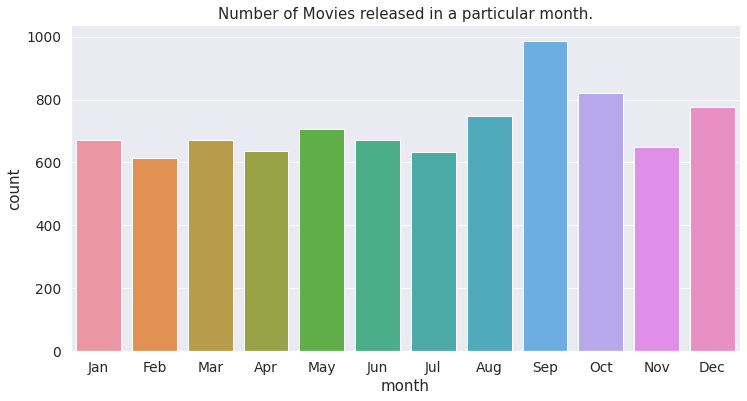

In [139]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

<AxesSubplot:title={'center':'Average Gross by the Month for Blockbuster Movies'}, xlabel='mon', ylabel='revenue'>

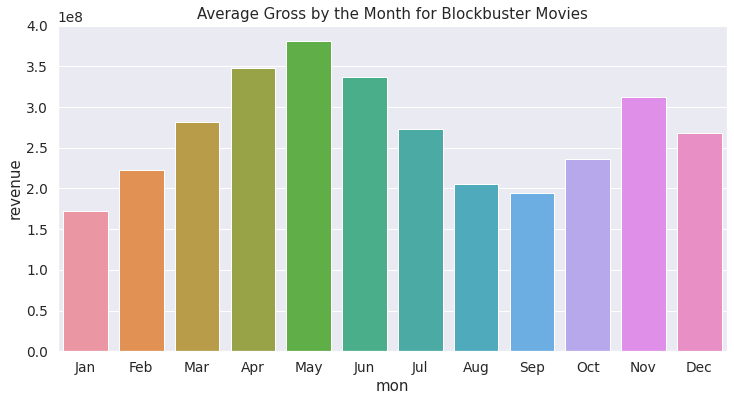

In [140]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

(0.0, 12.0)

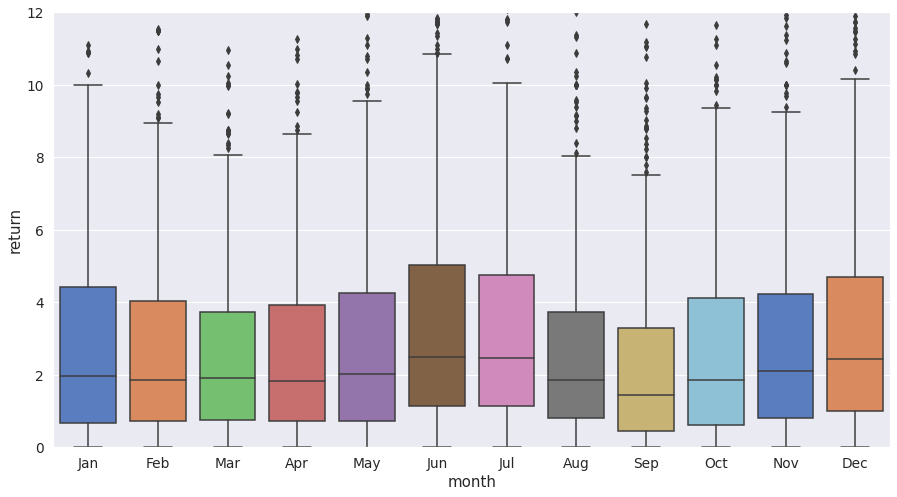

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

<AxesSubplot:title={'center':'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

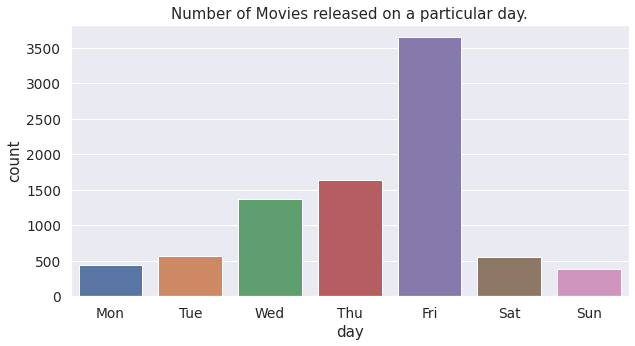

In [142]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

**Friday** is the most popular day for movie releases. 

#### Number of Movies by the year

<AxesSubplot:xlabel='year'>

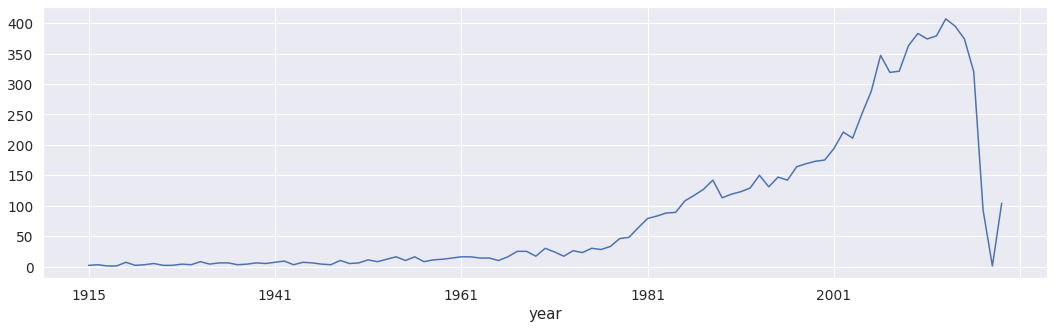

In [143]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

We notice that there is a sharp rise in the number of movies **starting the 1990s decade.**

#### Earliest Movies Represented

In [144]:
df[df['year'] != 'NaT'][['title', 'year']].sort_values('year').head(10)

,title,year
493,The Birth of a Nation,1915
50033,The Cheat,1915
166315,A Daughter of the Gods,1916
2025,Intolerance,1916
18946,"20,000 Leagues Under the Sea",1916
37446,Mickey,1918
5265,The Kid,1921
797,The Gold Rush,1925
36694,The Merry Widow,1925
16755,The Unholy Three,1925


In [145]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [146]:
df_21 = df.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21 = df_21[df_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)

<AxesSubplot:xlabel='year', ylabel='month'>

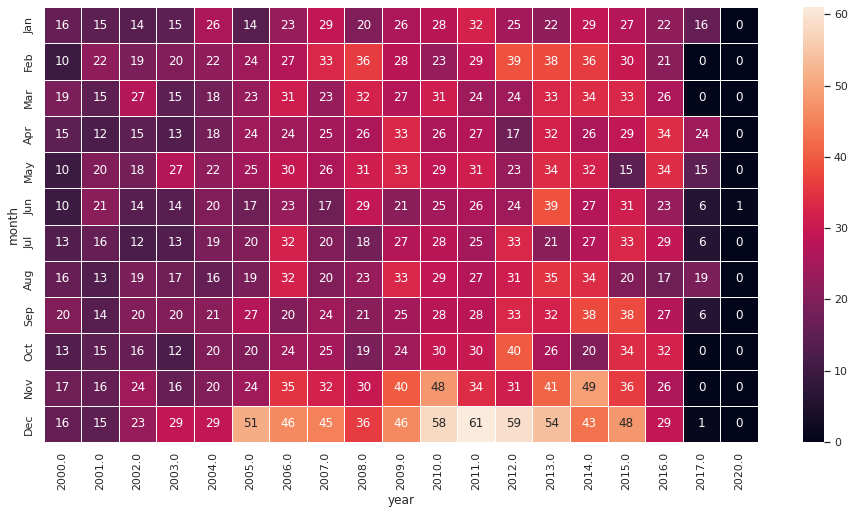

In [147]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

In [148]:
sns.set(font_scale=1.25)

### Movie Status

In [149]:
df['status'].value_counts()

Released           8658
Rumored              12
Post Production       7
In Production         7
Canceled              1
Name: status, dtype: int64

### Spoken Languages

In [150]:
df['spoken_languages'].value_counts()

English             6047
none                 330
Español              293
Français             235
Pусский              208
Deutsch              159
हिन्दी               155
日本語                  138
العربية              132
தமிழ்                 90
Italiano              89
普通话                   85
广州话 / 廣州話             82
한국어/조선말               67
Český                 53
తెలుగు                35
Português             35
Türkçe                29
Dansk                 26
svenska               24
Nederlands            22
Română                21
Latin                 14
ภาษาไทย               14
বাংলা                 14
Magyar                14
Polski                13
ελληνικά              11
اردو                  11
עִבְרִית              10
Català                 9
فارسی                  9
suomi                  9
No Language            9
ਪੰਜਾਬੀ                 8
Bahasa melayu          7
Norsk                  7
български език         6
Srpski                 5
Afrikaans              5


In [151]:
# df[df['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

In [152]:
# sns.jointplot(x="spoken_languages", y="return", data=df, stat_func=stats.spearmanr, color="m")

### Runtime

In [153]:
df['runtime'].describe()

count     8532.000000
mean       106.602438
std        134.612948
min          0.000000
25%         93.000000
50%        103.000000
75%        118.000000
max      12000.000000
Name: runtime, dtype: float64

In [154]:
df['runtime'] = df['runtime'].astype('float')

<AxesSubplot:xlabel='runtime', ylabel='Density'>

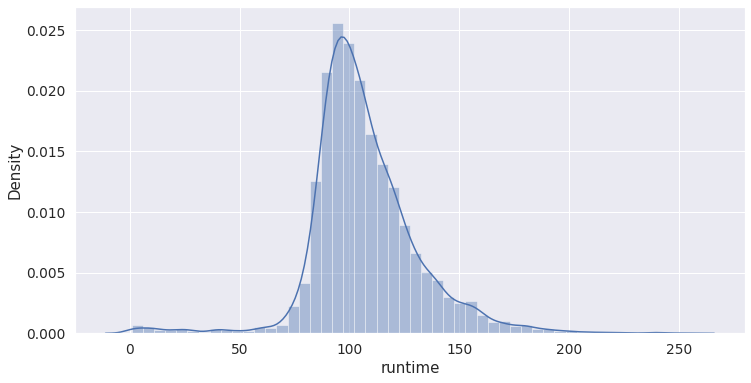

In [155]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

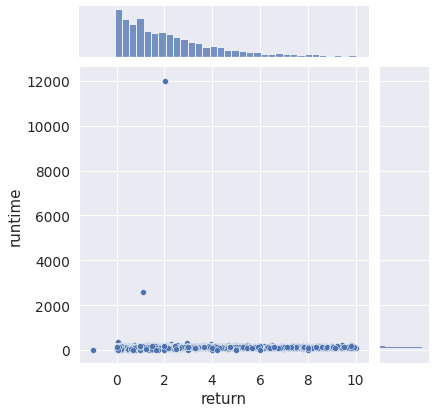

In [156]:
df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot('return', 'runtime', data=df_mat)
plt.show()

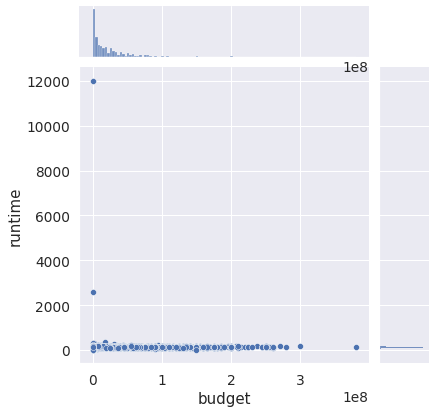

In [157]:
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=df_mat)
plt.show()

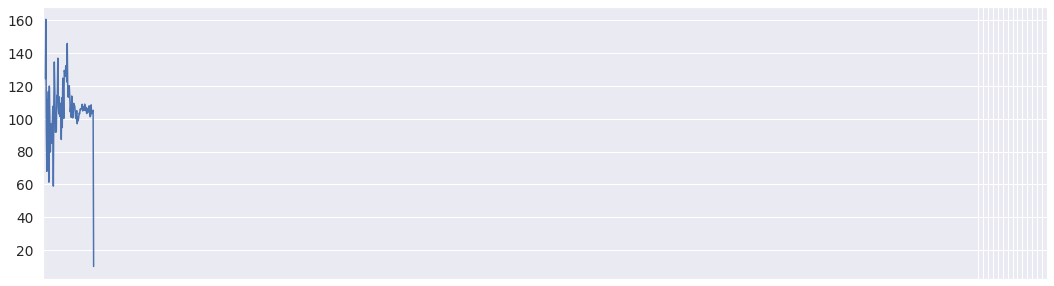

In [158]:
plt.figure(figsize=(18,5))
year_runtime = df[df['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

#### Shortest Movies

In [159]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
158337,1.0,Continuity Error,2014
321624,1.0,Sultan,NaT
173526,1.0,Ho Ho Ho 2 : A family lottery,2012
173636,1.0,bvntyr,NaT
275071,1.0,Blokes on Coke,2015
188469,1.0,My Dog Acting Crazy,2014
327428,1.0,Baadshaho,NaT
327257,1.0,Drive ((2011) (2017)),2017
252156,1.0,The Enemy Within,NaT
268496,1.0,Android Tutorial,NaT


#### Longest Movies

In [160]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
237354,12000.0,boenk qb ciamis mendadak menjadi superman,NaT
269437,2563.0,sakthivel,NaT
91989,360.0,Jorge Cervantes Ultimate Grow 2,2007
28603,338.0,Carlos,2010
78559,320.0,Gangs of Wasseypur,2012
198499,300.0,Def Comedy Jam Classics: Volume Two,2006
5774,254.0,Gettysburg,1993
4009,248.0,Cleopatra,1963
9157,241.0,UFC 94: St-Pierre vs. Penn 2,2009
148400,240.0,WWE WrestleMania XXX,2014


### Budget

In [161]:
df['budget'].describe()

count    5.986000e+03
mean     2.760686e+07
std      3.909766e+07
min      1.000000e+00
25%      3.000000e+06
50%      1.300000e+07
75%      3.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

<AxesSubplot:xlabel='budget', ylabel='Density'>

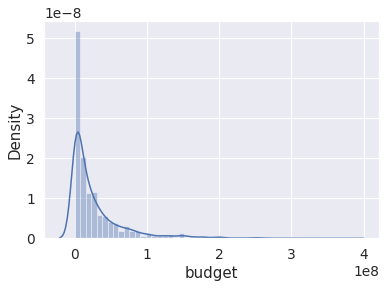

In [162]:
sns.distplot(df[df['budget'].notnull()]['budget'])

<AxesSubplot:ylabel='Frequency'>

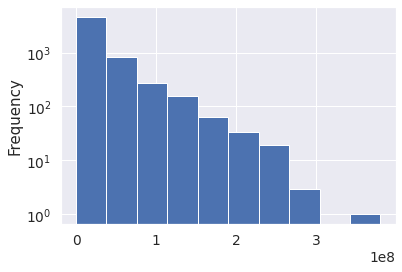

In [163]:
df['budget'].plot(logy=True, kind='hist')

#### Most Expensive Movies of all Time

In [164]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
1243,Pirates of the Caribbean: On Stranger Tides,380000000.0,1045713802,2.751878,2011
238,Pirates of the Caribbean: At World's End,300000000.0,961000000,3.203333,2007
68845,Avengers: Age of Ultron,280000000.0,1405035767,5.017985,2015
972,Superman Returns,270000000.0,391081192,1.448449,2006
33729,John Carter,260000000.0,284139100,1.092843,2012
24746,Tangled,260000000.0,591794936,2.276134,2010
217428,Transformers: The Last Knight,260000000.0,435353351,1.674436,2017
439,Spider-Man 3,258000000.0,890871626,3.452991,2007
39825,The Lone Ranger,255000000.0,89289910,0.350157,2013
39800,The Hobbit: The Desolation of Smaug,250000000.0,958400000,3.833600,2013


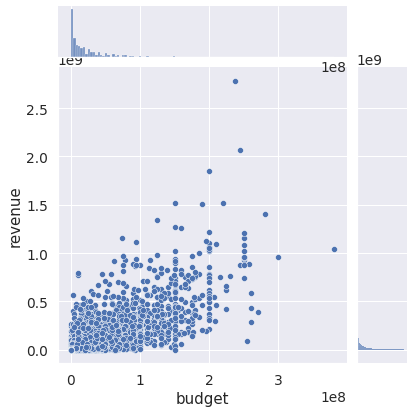

In [165]:
sns.jointplot(x='budget',y='revenue',data=df[df['return'].notnull()])

### Revenue

In [166]:
df['revenue'].describe()

count    8.690000e+03
mean     5.807828e+07
std      1.362443e+08
min     -1.200000e+01
25%      7.936468e+05
50%      1.000000e+07
75%      5.030705e+07
max      2.781506e+09
Name: revenue, dtype: float64

<AxesSubplot:xlabel='revenue', ylabel='Density'>

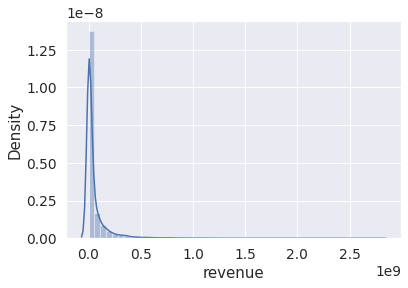

In [167]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

#### Highest Grossing Films of All Time

In [168]:
gross_top = df[['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,title,budget,revenue,year
12167,Avatar,237000000.0,2781505847,2009
90013,Star Wars: The Force Awakens,245000000.0,2068223624,2015
474,Titanic,200000000.0,1845034188,1997
14575,The Avengers,220000000.0,1519557910,2012
87484,Jurassic World,150000000.0,1513528810,2015
102940,Furious 7,190000000.0,1506249360,2015
68845,Avengers: Age of Ultron,280000000.0,1405035767,2015
7164,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1342000000,2011
74057,Frozen,150000000.0,1274219009,2013
204767,Beauty and the Beast,160000000.0,1256977550,2017


In [169]:
pd.set_option('display.max_colwidth', 50)

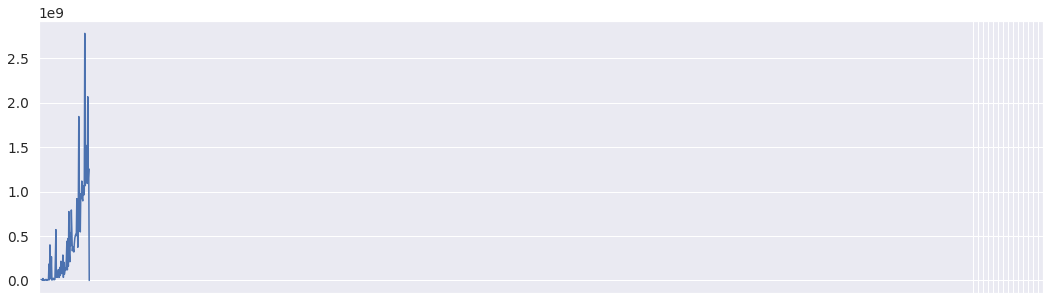

In [170]:
plt.figure(figsize=(18,5))
year_revenue = df[(df['revenue'].notnull()) & (df['year'] != 'NaT')].groupby('year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

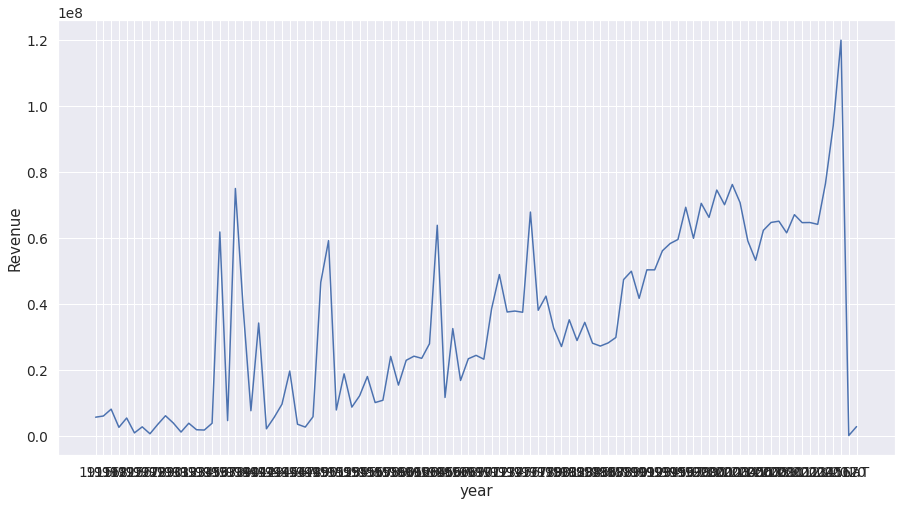

In [171]:
plt.figure(figsize=(15,8))
yearly=df.groupby(df['year'])['revenue'].agg('mean')
plt.plot(yearly.index,yearly)
plt.xlabel('year')
plt.ylabel("Revenue")
plt.savefig('fig')

### Returns

#### Most Successful Movies

In [ ]:
df[(df['return'].notnull()) & (df['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)

#### Worst Box Office Disasters

In [ ]:
df[(df['return'].notnull()) & (df['budget'] > 5e6) & (df['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)

With these analyses in place, we are in a good position to construct our correlation matrix.

In [ ]:
df['year'] = df['year'].replace('NaT', np.nan)

In [ ]:
df['year'] = df['year'].apply(clean_numeric)

In [ ]:
sns.set(font_scale=1)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

In [ ]:
sns.set(font_scale=1.25)

### Genres

In [ ]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [ ]:
gen_df = df.drop('genres', axis=1).join(s)

In [ ]:
gen_df['genre'].value_counts().shape[0]

TMDB defines 32 different genres for our set of 45,000 movies. Let us now have a look at the most commonly occuring genres in movies.

In [ ]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

In [ ]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

In [ ]:
pop_gen_movies = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year'] >= 2000) & (gen_df['year'] <= 2017)]
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

In [ ]:
ctab[genres].plot(kind='line', stacked=False, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

In [ ]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='revenue', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 3e8])
plt.show()

In [ ]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()

### Cast and Crew

In [ ]:
credits_df = pd.read_csv('../data/AllMoviesCastingRaw.csv')
credits_df.head()

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
df['id'] = df['id'].apply(convert_int)

In [ ]:
df[df['id'].isnull()]

In [ ]:
df

In [ ]:
# df = df.drop([19730, 29503, 35587])

In [ ]:
df['id'] = df['id'].astype('int')

In [ ]:
df = df.merge(credits_df, on='id')
df.shape

In [ ]:
df

In [ ]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

In [ ]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [ ]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
df['director'] = df['crew'].apply(get_director)

In [ ]:
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)



#### Actors with the Highest Total Revenue

In [ ]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

#### Directors with the Highest Total Revenue

In [ ]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()

In [ ]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

#### Actors with Highest Average Revenue

In [ ]:
plt.title("Actors with Highest Average Revenue")
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='Greens_r')
plt.show()

#### Directors with Highest Average Revenue

In [ ]:
plt.title("Directors with Highest Average Revenue")
df[df['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()



#### Most Successful Actors

In [ ]:
success_df = cast_df[(cast_df['return'].notnull()) & (cast_df['revenue'] > 1e7) & (cast_df['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

#### Most Successful Directors

In [ ]:
success_df = df[(df['return'].notnull()) & (df['revenue'] > 1e7) & (df['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

In [ ]:
df[(df['director'] == 'John G. Avildsen') & (df['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]